# Advance Business Analytics (95866)

# Homework 1

# Spring 2024


In [1]:
# Import required libraries :
import io
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats 
import statsmodels.formula.api as smf
from patsy import dmatrices
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter     

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question 1

**The data consists of measurements made on patients with malignant melanoma. Each patient had their tumor removed by surgery during the period 1962 to 1977. The surgery consisted of complete removal of the tumor together with about 2.5cm of the surrounding skin. Among the measurements taken were the thickness of the tumor and whether it was ulcerated or not. These are thought to be important prognostic variables such that patients with a thick and/or ulcerated tumor have an increased chance of death from melanoma. Patients were followed until the end.**

**This data frame contains the following columns:**
- Time_month: Survival time in months since the operation, possibly censored. 
- Status: The patient status at the end of the study. 1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3 indicates that they had died from causes unrelated to their melanoma. 
- Gender: The patients’ Gender; 1=male, 0=female. 
- Age: Age in years at the time of the operation. 
- Year: Year of operation. 
- Thickness:  tumor thickness in mm. 
- Ulcer: Indicator of ulceration; 1=present, 0=absent. 

First, we'll transform status into a binary outcome "dead" (of melanoma) if the patient is observed to die from melanoma (status =1) and 0 otherwise (censored).

In [2]:
df_data = pd.read_excel('hw1_s24_data.xlsx')
df_data['dead'] = (df_data.status == 1)*1
df_data = df_data.drop(columns=['Unnamed: 0','status'])
df_data

,time_month,Gender,age,year,thickness,ulcer,dead
0,1,1,76,1972,6.76,1,0
1,1,1,56,1968,0.65,1,0
2,1,1,41,1977,1.34,0,0
3,3,0,71,1968,2.90,0,0
4,6,1,52,1965,12.08,0,1
...,...,...,...,...,...,...,...
200,150,1,29,1965,7.06,0,0
201,156,0,40,1965,6.12,1,0
202,156,0,42,1965,0.48,1,0
203,164,0,50,1964,2.26,0,0


### (i)	Plot the Kaplan Meier curve for survival. Do the same for male vs female [5]

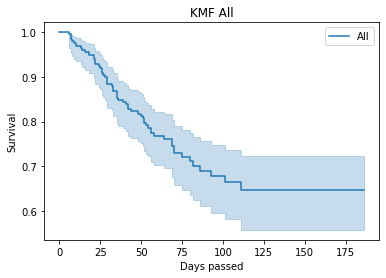

In [3]:
#For all
#create fitter for each group
kmf_all = KaplanMeierFitter() 

# we want to fit the duration when the event is "dead"
kmf_all.fit(durations =  df_data["time_month"], event_observed = df_data["dead"],label='All')


# Plot the survival_function data :
kmf_all.plot()
plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF All")
plt.show()

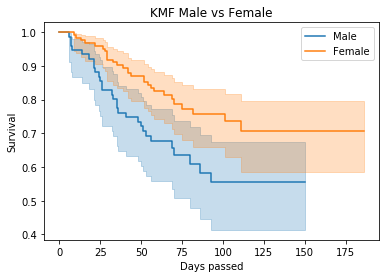

In [4]:
#Male vs Women

#create fitter for each group
df_male = df_data[(df_data.Gender == 1)].reset_index(drop=True)
df_female = df_data[(df_data.Gender == 0)].reset_index(drop=True)

kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

# we want to fit the duration when the event is "dead"
kmf_m.fit(durations =  df_male["time_month"], event_observed = df_male["dead"],label='Male')
kmf_f.fit(durations =  df_female["time_month"], event_observed = df_female["dead"],label='Female')


# Plot the survival_function data :
kmf_m.plot()
kmf_f.plot()
plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF Male vs Female")
plt.show()

### (ii)	Estimate a Cox regression to estimate the impact of the covariates. Write the equation and then estimate the model. How will you interpret these estimates? [10]

We estimate the following model:

$$h(t | X) = h_0(t) \exp(\beta_1 \times \text{Gender} + \beta_2 \times \text{age} + \beta_3 \times \text{year} + \beta_4 \times \text{thickness} + \beta_5 \times \text{ulcer})$$

\begin{align*}
h(t | X) & : \text{Hazard function at time } t \text{ given covariates } X \\
h_0(t) & : \text{Baseline hazard function at time } t \\
\beta_1, \beta_2, \beta_3, \beta_4, \beta_5 & : \text{Coefficients for the respective covariates} \\
\end{align*}



In [5]:
cols_for_model = ['Gender', 'age', 'year', 'thickness', 'ulcer', 'time_month', 'dead']
df_data_cox= df_data[cols_for_model].reset_index(drop=True)
df_data_cox

,Gender,age,year,thickness,ulcer,time_month,dead
0,1,76,1972,6.76,1,1,0
1,1,56,1968,0.65,1,1,0
2,1,41,1977,1.34,0,1,0
3,0,71,1968,2.90,0,3,0
4,1,52,1965,12.08,0,6,1
...,...,...,...,...,...,...,...
200,1,29,1965,7.06,0,150,0
201,0,40,1965,6.12,1,156,0
202,0,42,1965,0.48,1,156,0
203,0,50,1964,2.26,0,164,0


In [6]:
from lifelines import CoxPHFitter
cpm = CoxPHFitter()

cpm.fit(df=df_data_cox
        ,duration_col= 'time_month'
        ,event_col= 'dead')

cpm.print_summary(model="Cox Model", decimals=3)

<lifelines.CoxPHFitter: fitted with 205 total observations, 148 right-censored observations>
             duration col = 'time_month'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 205
number of events observed = 57
   partial log-likelihood = -268.898
         time fit was run = 2024-02-15 02:53:58 UTC
                    model = Cox Model

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Gender     0.604      1.829      0.274            0.067            1.141                1.069                3.130
age        0.016      1.016      0.009           -0.002            0.033                0.998                1.034
year      -0.083      0.920      0.058           -0.197            0.032                0.821                1.032
thickness  0.147      1.158      0.034            0.080            0.214                1.083                1.238
ulcer      0.327      1.386      0.274           -0.211            0.864                0.810                2.373

               z       p   -log2(p)
covariate                          
Gender     2.204   0.028      5.184
age        1.765   0.077      3.690
year      -1.419   0.156      2.682
thickness  4.288 <0.0005     15.763
ulcer      1.192   0.233      2.099
---
Concordance = 0.704
Partial AIC = 547.797
log-likelihood ratio test = 29.203 on 5 df
-log2(p) of ll-ratio test = 15.528

1. **Gender**:
    - **Coefficient**: $ \beta_{\text{Gender}} = 0.604 $. Being male (Gender=1 indicates male) is associated with an increased hazard, compared to being female.
    - **Hazard Ratio**: $ \exp(0.604) = 1.829 $. Males have about 1.829 times the hazard of experiencing the event compared to females, holding other variables constant.
    - **Significance**: With a p-value of 0.028, the effect of gender is statistically significant at the 0.05 level.

2. **Age**:
    - **Coefficient**: $ \beta_{\text{age}} = 0.016 $. The hazard increases slightly with age.
    - **Hazard Ratio**: $ \exp(0.016) = 1.016 $. For each additional year of age, the hazard increases by about 1.6%, holding other variables constant.
    - **Significance**: With a p-value of 0.077, the effect of age is not significant at the 0.05 level.

3. **Year**:
    - **Significance**: With a p-value of 0.156, the effect of the year is not statistically significant at the 0.05 level.

4. **Thickness**:
    - **Coefficient**: $ \beta_{\text{thickness}} = 0.147 $. The hazard increases as the thickness value increases.
    - **Hazard Ratio**: $ \exp(0.147) = 1.158 $. For each additional unit increase in thickness, the hazard increases by about 15.8%, holding other variables constant.
    - **Significance**: With a p-value of <0.0005, the effect of thickness is highly statistically significant.

5. **Ulcer**:
    - **Significance**: With a p-value of 0.233, the effect of ulcer presence is not statistically significant at the 0.05 level.

### (iii)	Can you provide some rationale for testing the proportionality assumption? How would you do it in Python? Now provide the results of the test and comment on what you find. [7]

The proportional hazard assumption is that all individuals have the same hazard function, separated by a unique scaling factor. So the shape of the hazard function is the same for all individuals, and only a scalar multiple changes per individual. Or $ℎ_𝑖 (𝑡)=𝑎_𝑖 ℎ(𝑡) $ This two hazard rate are only different by a scalar which is not a function of time

The hazard ratio is assumed to be always constant. Therefore, if we suspect that the effect of the covariate is not constant over time, the assumption might be violated. 

To test for it, we can use the lifelines package's proportional_hazards_test or the check_assumptions function. Essentially it compares hazard ratio of a covariate (ith baseline) at different times to test if the ratio remians constant. Technically, it runs the Chi-square(1) test on the statistic described by Grambsch and Therneau to detect whether the regression coefficients vary with time. 

In [7]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(cpm, df_data_cox)
results.print_summary(decimals=3, model="prop hazard")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 205 total observations, 148 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic    p  -log2(p)
Gender               1.97 0.16      2.64
age                  2.55 0.11      3.18
thickness            2.80 0.09      3.41
ulcer                0.26 0.61      0.71
year                 0.13 0.72      0.47

In [8]:
cpm.check_assumptions(df_data_cox, p_value_threshold=0.05,  show_plots =  True) 

Proportional hazard assumption looks okay.


/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


[]

We don't find evidence of violations to the proportionality assumption

### (iv)	In this model, you assume that the shape of the hazard is the same and the tumor thickness shifts it proportionally.  However, it is possible that the shape of the hazard is different for different tumor thickness. You plan to stratify based on thickness. Since tumor thickness is a continuous measure, your first create a dummy variable which is 1 when tumor thickness is above median and 0 otherwise. 

In [9]:
#get the value of the median
df_data_cox[["thickness"]].describe()

,thickness
count,205.000000
mean,2.919854
std,2.959433
min,0.100000
25%,0.970000
50%,1.940000
75%,3.560000
max,17.420000


In [10]:
median_thickness = df_data_cox[["thickness"]].median()[0]
print("median_thickness % s " % median_thickness)

median_thickness 1.94 


In [11]:
#dummy that indicates if thickness is larger than median
df_data_cox["thick_dummy"]= (df_data_cox.thickness>median_thickness)*1
df_data_cox.head()

,Gender,age,year,thickness,ulcer,time_month,dead,thick_dummy
0,1,76,1972,6.76,1,1,0,1
1,1,56,1968,0.65,1,1,0,0
2,1,41,1977,1.34,0,1,0,0
3,0,71,1968,2.90,0,3,0,1
4,1,52,1965,12.08,0,6,1,1


### You now stratify your model based on thickness dummy. Operationalize this in your python code. Provide the output.[10]

In [12]:
cols_to_model = ['Gender', 'age', 'year', 'thick_dummy', 'ulcer', 'time_month', 'dead']
df_data_cox_strata= df_data_cox[cols_to_model].reset_index(drop=True)
df_data_cox_strata.head()

,Gender,age,year,thick_dummy,ulcer,time_month,dead
0,1,76,1972,1,1,1,0
1,1,56,1968,0,1,1,0
2,1,41,1977,0,0,1,0
3,0,71,1968,1,0,3,0
4,1,52,1965,1,0,6,1


In [13]:
#fit and print summary
cpm_strata = CoxPHFitter()

cpm_strata.fit(df = df_data_cox_strata
        ,duration_col= 'time_month'
        ,event_col='dead'
        ,strata=['thick_dummy'])
cpm_strata.print_summary(model="Strata model", decimals=3)

<lifelines.CoxPHFitter: fitted with 205 total observations, 148 right-censored observations>
             duration col = 'time_month'
                event col = 'dead'
                   strata = ['thick_dummy']
      baseline estimation = breslow
   number of observations = 205
number of events observed = 57
   partial log-likelihood = -235.449
         time fit was run = 2024-02-15 02:53:58 UTC
                    model = Strata model

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Gender     0.437      1.547      0.274           -0.101            0.974                0.904                2.650
age        0.012      1.012      0.009           -0.005            0.030                0.995                1.030
year      -0.052      0.949      0.057           -0.163            0.059                0.849                1.061
ulcer      0.119      1.126      0.273           -0.415            0.653                0.660                1.922

               z     p   -log2(p)
covariate                        
Gender     1.591 0.112      3.163
age        1.394 0.163      2.614
year      -0.920 0.358      1.484
ulcer      0.437 0.662      0.594
---
Concordance = 0.593
Partial AIC = 478.898
log-likelihood ratio test = 4.856 on 4 df
-log2(p) of ll-ratio test = 1.725

### Why do you think the estimates have changed?  [5]

We stratify based on having a larger than median thickness (thick_dummy=1) or not (thick_dummy=0), if we believe that the hazard is different between these two levels. Recall the proportion hazard model shifts the hazard propotionally and we get the estimates by this assumption. If the hazard are diffent (and not proportinal) then this assumption is problematic. Stratification allows two hazards to be estimated and allow for the hazard to differ by strata.



We compare the coefficients before and after doing strata.

There are two baseline hazard for thick_dummy = 0 and for thick_dummy = 1. The impact of covariates is an average impact of how covariates change the first hazard and the second hazard. Clearly, this is different than the first specification where there is one hazard estimated.

$h(t|X) = h_{0,thickDummy=0}(t) \exp(X\beta)$

$h(t|X) = h_{0,thickDummy=1}(t) \exp(X\beta)$

In [14]:
cpm.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
Gender,0.603928,1.829290,0.273977,0.066943,1.140913,1.069234,3.129625,2.204301,0.027503,5.184257
age,0.015640,1.015763,0.008859,-0.001724,0.033004,0.998278,1.033555,1.765418,0.077494,3.689781
year,-0.082888,0.920454,0.058408,-0.197365,0.031589,0.820891,1.032093,-1.419131,0.155861,2.681669
thickness,0.146681,1.157984,0.034203,0.079644,0.213718,1.082901,1.238274,4.288496,0.000018,15.762547
ulcer,0.326670,1.386344,0.274127,-0.210610,0.863950,0.810090,2.372514,1.191673,0.233390,2.099188


In [15]:
cpm_strata.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
Gender,0.436549,1.547358,0.274433,-0.101330,0.974428,0.903635,2.649652,1.590731,0.111670,3.162684
age,0.012290,1.012366,0.008816,-0.004989,0.029570,0.995023,1.030011,1.394039,0.163306,2.614351
year,-0.052128,0.949208,0.056664,-0.163187,0.058931,0.849433,1.060702,-0.919950,0.357599,1.483585
ulcer,0.119037,1.126411,0.272619,-0.415286,0.653359,0.660151,1.921987,0.436641,0.662372,0.594287


We notice that the even though they are directionally similar (positive or negative), the coefficients for most covariates have shrunken and in some cases, such as age, are no longer significant. 